In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import re
%matplotlib inline
import warnings
warnings.filterwarnings('ignore');

Loading the data

In [2]:
dfRaw = pd.read_csv('data/amazon_prime_titles.csv')
dfRaw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [3]:
dfRaw.head(5).style.set_properties(**{"background-color":"beige",
                                        "color":"black",
                                        "border-color":"black",
                                        "border-width":"1px",
                                        "border-style":"solid"})

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,nan,113 min,"Comedy, Drama","A small fishing village must procure a local doctor to secure a lucrative business contract. When unlikely candidate and big city doctor Paul Lewis lands in their lap for a trial residence, the townsfolk rally together to charm him into staying. As the doctor's time in the village winds to a close, acting mayor Murray French has no choice but to pull out all the stops."
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Criminal threatening their stability and pride.
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, Richard Jones, Yancey Arias, Noel Gugliemi",United States,"March 30, 2021",2017,nan,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on him with a neighborhood kid he goes down a furious path of self-destruction
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney Spears, Christina Aguilera, more!",United States,"March 30, 2021",2014,nan,69 min,Documentary,"Pink breaks the mold once again, bringing her career to a new level in 2013 with a world tour that entertains unlike ever before! Get inside access to ""the girl who got the party started"" with exclusive interviews and rare live performances."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Costigan, Amanda Dickinson, Alison Steadman, Grant Bardsley, Bill Moody, Matthew Scurfield",United Kingdom,"March 30, 2021",1989,nan,45 min,"Drama, Fantasy","Teenage Matt Banting wants to work with a famous but eccentric creature/special effects man named Chancey Bellows. He gets more than he bargained for when one of the creatures, the giant dragon-like Ultragorgon, takes Matt under his wing. Matt is forced to confront his inner monsters while working out his issues with his father."


Algumas perguntas a serem respondidas
1. Qual tipo é mais comum?
2. Qual diretor possui a maior quantidade de trabalhos no catálogo?
3. Qual a duração média dos filmes, seriados, show, etc...
4. Como os filmes estão listados? comédia, drama, suspense, etc...
5. Quais atores trabalharam com mais frequência em projetos na Amazon?
6. Dos principais diretores qual é o rating de seus trabalhos?
7. Qual mês do ano possui a maior quantidade de conteúdo adicionado?
8. Agregar o tipo de conteúdo entre filmes e outros conteúdo por períodos específicos

In [4]:
dfRaw.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [5]:
dfRaw.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

### Qual tipo é mais comum?
Contando a quantidade da variável type podemos responder a essa pergunta facilmente

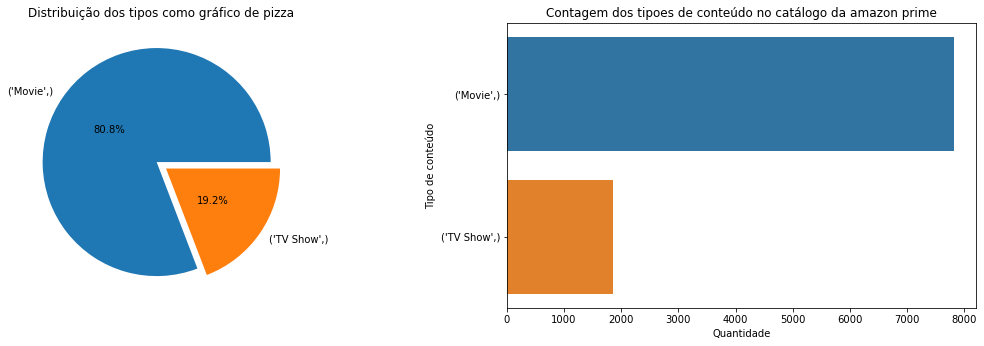

In [6]:
dfTypeCnt = dfRaw[['type']].value_counts()
dfTypeCnt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,6))

ax[0].pie(dfTypeCnt.values,labels=dfTypeCnt.index.values,autopct="%.1f%%", explode=[0.05]*2, pctdistance=0.5);
ax[0].set_title("Distribuição dos tipos como gráfico de pizza")

sns.barplot(x = dfTypeCnt.values, y = dfTypeCnt.index.values, ax = ax[1])
ax[1].set_title("Contagem dos tipoes de conteúdo no catálogo da amazon prime")
ax[1].set_ylabel('Tipo de conteúdo')
ax[1].set_xlabel('Quantidade')



plt.tight_layout(pad=5)
plt.show()

### Qual diretor possui a maior quantidade de trabalhos no catálogo?

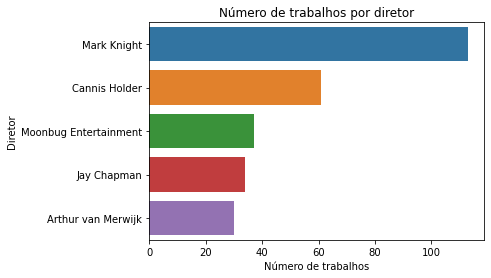

In [7]:
dfDirectorCnt = pd.DataFrame(dfRaw['director'].dropna().value_counts())
sns.barplot(x = dfDirectorCnt.head()['director'].values, y = dfDirectorCnt.head().index.values)
plt.xlabel('Número de trabalhos')
plt.ylabel('Diretor')
plt.title("Número de trabalhos por diretor");

### Qual é a duração média dos conteúdos?

In [8]:
dfAnalysis = dfRaw.copy()
dfAnalysis['DurationNum'] = dfAnalysis['duration'].map(lambda x: re.split(" ", x)[0]).astype(int)
dfAnalysis['DurationType'] = dfAnalysis['duration'].map(lambda x: re.split(" ", x)[1])
dfAnalysis['DurationType'].replace(to_replace='Season', value='Seasons', inplace=True)

dfDuration = dfAnalysis.groupby("type")['DurationNum'].agg([min, max, np.mean, np.median,mode])
dfDuration

,min,max,mean,median,mode
type,,,,,
Movie,0,601,91.311876,91.0,"([90], [223])"
TV Show,1,29,1.723301,1.0,"([1], [1342])"


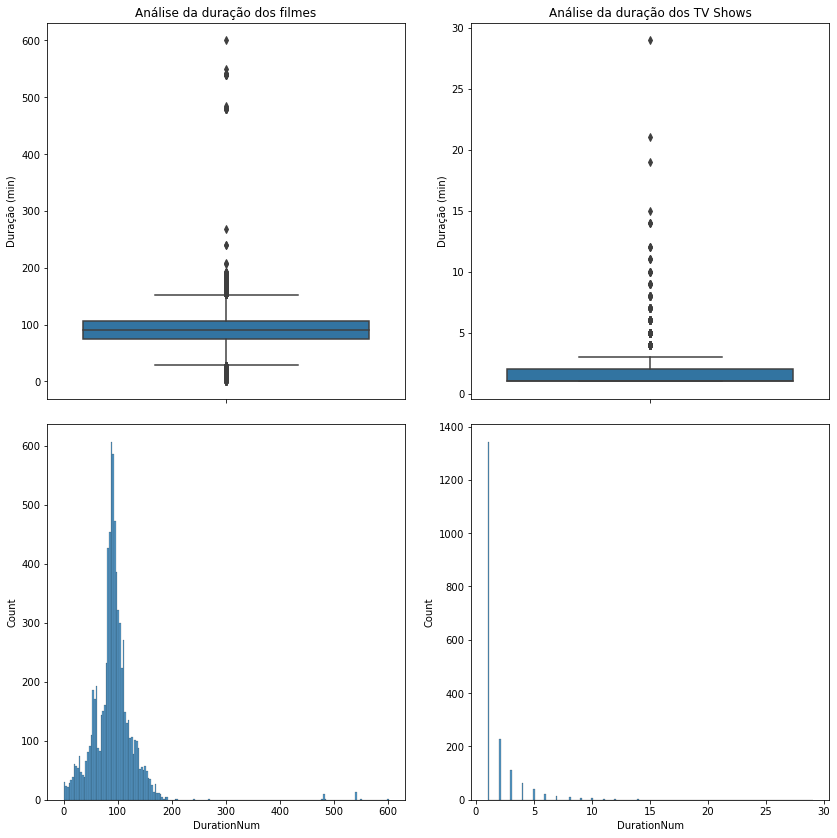

In [9]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = (12,12))


sns.boxplot(y = 'DurationNum', data = dfAnalysis[dfAnalysis['type'] == 'Movie'], ax=ax[0,0])
ax[0,0].set_title('Análise da duração dos filmes')
ax[0,0].set_ylabel("Duração (min)")

sns.boxplot(y = 'DurationNum', data = dfAnalysis[dfAnalysis['type'] == 'TV Show'], ax=ax[0,1])
ax[0,1].set_title('Análise da duração dos TV Shows')
ax[0,1].set_ylabel("Duração (min)")


sns.histplot(dfAnalysis[dfAnalysis['type'] == 'Movie']['DurationNum'], ax=ax[1,0])

sns.histplot(dfAnalysis[dfAnalysis['type'] == 'TV Show']['DurationNum'], ax=ax[1,1])


plt.tight_layout(pad=2)
plt.show()

#Escrever aqui a análise sobre a duração dos conteúdos em geral

### Como os filmes estão listados? comédia, drama, suspense, etc...

In [10]:
dfRaw['listed_in'].str.split(",")

0                  [Comedy,  Drama]
1           [Drama,  International]
2       [Action,  Drama,  Suspense]
3                     [Documentary]
4                 [Drama,  Fantasy]
                   ...             
9663                       [Comedy]
9664                     [TV Shows]
9665                       [Action]
9666               [Drama,  Sports]
9667    [Action,  Drama,  Suspense]
Name: listed_in, Length: 9668, dtype: object

In [11]:
listing = []
for i in dfRaw['listed_in'].str.split(","):
    for s in i:
        listing.append(re.sub("\A ","",s))
serieListed = pd.Series(listing)
serieListed.value_counts().head(10)

Drama               3687
Comedy              2099
Action              1657
Suspense            1501
Kids                1085
Documentary          993
Special Interest     980
Horror               875
Romance              674
Animation            547
dtype: int64

In [12]:
serieListed.unique()

array(['Comedy', 'Drama', 'International', 'Action', 'Suspense',
       'Documentary', 'Fantasy', 'Kids', 'Special Interest',
       'Science Fiction', 'Adventure', 'Horror', 'Sports',
       'Talk Show and Variety', 'Anime', 'Arts', 'Entertainment',
       'and Culture', 'TV Shows', 'Animation',
       'Music Videos and Concerts', 'Fitness', 'Faith and Spirituality',
       'Military and War', 'Western', 'LGBTQ', 'Romance', 'Unscripted',
       'Young Adult Audience', 'Arthouse', 'Historical'], dtype=object)

In [13]:
listing = []
for i in dfRaw['listed_in'].str.split(","):
    list2 = []
    for s in i:
        list2.append(re.sub("\A ","",s))
    listing.append(sorted(list2))
listing
df1 = pd.DataFrame({"list":listing})

In [14]:
dfSplitedListing = pd.DataFrame(columns=serieListed.unique(), index=range(dfRaw.shape[0]))
n = 0
for i in df1['list']:
    for element in i:
        dfSplitedListing.loc[n,element] = True
    n+=1
dfSplitedListing.fillna(False, inplace = True)

In [15]:
from mlxtend.frequent_patterns import apriori, association_rules
associacoesFrequentes = apriori(dfSplitedListing, min_support = 0.01, use_colnames = True)
associacoesFrequentes['length'] = associacoesFrequentes['itemsets'].apply(lambda x: len(x))

associacoesFrequentes

,support,itemsets,length
0,0.217108,(Comedy),1
1,0.381361,(Drama),1
2,0.036719,(International),1
3,0.171390,(Action),1
4,0.155254,(Suspense),1
...,...,...,...
65,0.022342,"(and Culture, Comedy, Arts, Special Interest)",4
66,0.022342,"(Entertainment, and Culture, Comedy, Special I...",4
67,0.034237,"(and Culture, Comedy, Arts, Entertainment)",4
68,0.022859,"(Entertainment, and Culture, Arts, Special Int...",4


In [16]:
associacoesFrequentes[(associacoesFrequentes['length'] >= 2) & 
                    (associacoesFrequentes['support'] >= 0.03)]

,support,itemsets,length
23,0.065784,"(Drama, Comedy)",2
28,0.034237,"(Comedy, Arts)",2
29,0.034237,"(Comedy, Entertainment)",2
30,0.034237,"(Comedy, and Culture)",2
33,0.066612,"(Drama, Action)",2
34,0.076127,"(Drama, Suspense)",2
39,0.040960,"(Drama, Romance)",2
40,0.036926,"(Action, Suspense)",2
43,0.035064,"(Horror, Suspense)",2
44,0.040443,"(Documentary, Special Interest)",2


### Quais gêneros de filmes geralmente estão juntos

In [17]:
rules = association_rules(associacoesFrequentes, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
136,"(and Culture, Special Interest)","(Comedy, Entertainment)",0.022859,0.034237,0.022342,0.977376,28.547634,0.021559,42.686740,2,2
118,"(Comedy, and Culture)","(Special Interest, Arts)",0.034237,0.022859,0.022342,0.652568,28.547634,0.021559,2.812467,2,2
104,"(Comedy, Entertainment)","(Special Interest, Arts)",0.034237,0.022859,0.022342,0.652568,28.547634,0.021559,2.812467,2,2
106,"(Special Interest, Entertainment)","(Comedy, Arts)",0.022859,0.034237,0.022342,0.977376,28.547634,0.021559,42.686740,2,2
107,"(Comedy, Arts)","(Special Interest, Entertainment)",0.034237,0.022859,0.022342,0.652568,28.547634,0.021559,2.812467,2,2
109,"(Special Interest, Arts)","(Comedy, Entertainment)",0.022859,0.034237,0.022342,0.977376,28.547634,0.021559,42.686740,2,2
135,"(Comedy, and Culture)","(Special Interest, Entertainment)",0.034237,0.022859,0.022342,0.652568,28.547634,0.021559,2.812467,2,2
134,"(Special Interest, Entertainment)","(Comedy, and Culture)",0.022859,0.034237,0.022342,0.977376,28.547634,0.021559,42.686740,2,2
133,"(Comedy, Entertainment)","(and Culture, Special Interest)",0.034237,0.022859,0.022342,0.652568,28.547634,0.021559,2.812467,2,2
178,"(and Culture, Comedy, Entertainment)","(Arts, Special Interest)",0.034237,0.022859,0.022342,0.652568,28.547634,0.021559,2.812467,3,2


### Quais atores trabalham com mais frequência nos filmes da Amazon?

In [18]:
dfRaw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [19]:
dfCopy = dfRaw.copy()
dfCopy['cast'].dtype

dtype('O')

In [20]:
dfCopy['cast'].str.split(',')

0       [Brendan Gleeson,  Taylor Kitsch,  Gordon Pins...
1       [Mahesh Manjrekar,  Abhay Mahajan,  Sachin Khe...
2       [Tom Sizemore,  Lorenzo Lamas,  Robert LaSardo...
3       [Interviews with: Pink,  Adele,  Beyoncé,  Bri...
4       [Harry Dean Stanton,  Kieran O'Brien,  George ...
                              ...                        
9663                          [Leo Gorcey,  Bobby Jordan]
9664    [DICK VOSBURGH,  RONNIE STEVENS,  LIBBY MORRIS...
9665    [Ray Stevenson,  Julian Wadham,  Richard Brake...
9666    [Esteban Recagno,  Ezequiel Stremiz,  Luciano ...
9667    [Michael Caine,  Emily Mortimer,  Joseph Gilgu...
Name: cast, Length: 9668, dtype: object

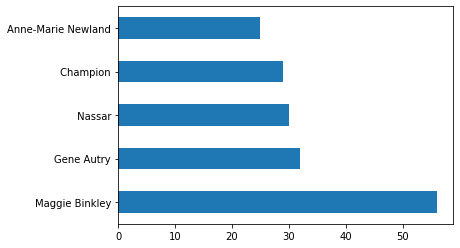

In [21]:
dfCopy = dfRaw.copy()
atores = []
try:

    for splits in dfCopy['cast'].dropna().str.split(','):
        for split in list(splits):
        #atores.append(re.sub("\A ","",split))
            atores.append(split)

except:
    print(splits)
    print(split)
sAtores = pd.Series(atores)
sAtores.replace({'nan':np.nan, "1": np.nan}, inplace=True)
sAtores.dropna().value_counts().head(5).plot.barh();

### dos principais diretores, qual o rating de seus trabalhos?

In [22]:
dfCopy['director'].value_counts().head(7)

Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Manny Rodriguez           22
John English              20
Name: director, dtype: int64

In [23]:
principaisDiretores = [x for x in dfCopy['director'].value_counts().head(7).index]
dfRatPrincipaisDiretores =  pd.DataFrame(dfCopy[dfCopy['director'].isin(principaisDiretores)].groupby('director')['rating'].value_counts()).rename({"rating":'Contagem'}, axis=1)

cm = sns.light_palette("green", as_cmap=True)
dfRatPrincipaisDiretores.reset_index(inplace=True)
dfRatPrincipaisDiretores.style.set_properties(**{"background-color":"beige",
                                        "color":"black",
                                        "border-color":"black",
                                        "border-width":"1px",
                                        "border-style":"solid"})

,director,rating,Contagem
0,Arthur van Merwijk,ALL,30
1,Cannis Holder,ALL,60
2,Cannis Holder,ALL_AGES,1
3,Jay Chapman,18+,22
4,Jay Chapman,16+,1
5,John English,13+,12
6,John English,7+,4
7,John English,NR,3
8,John English,16+,1
9,Manny Rodriguez,18+,22


### Qual mês do ano possui a maior quantidade de conteúdo adicionado

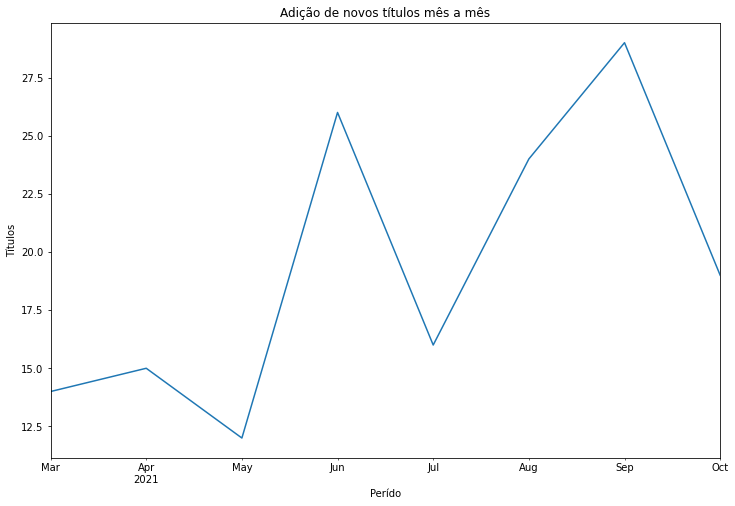

In [24]:
dfCopy['dateMonth'] = pd.to_datetime(dfCopy['date_added']).dt.to_period("M")
plt.figure(figsize=(12,8), facecolor = 'white')
ax = plt.axes()
ser = dfCopy.groupby('dateMonth')['dateMonth'].count()
ser.plot()
plt.title("Adição de novos títulos mês a mês")
plt.ylabel("Títulos")
plt.xlabel("Perído")
plt.show();


### Agregar os conteúdos por ano de publicação

In [25]:
def SeparaFaixas(registro, lancamento = [1920,1940,1960,1980,2000,2010,2015,2019,2022], faixas = ["1920..1940","1940..1960","1960..1980","1980..2000","2000..2010","2010..2015","2015..2019","2019..2021"]):

    if registro < lancamento[0]:
        return '<1920'
    elif registro >= lancamento[len(lancamento)-1]:
        return "..."
    else:
        for i in range(len(lancamento)-1):
            if registro >= lancamento[i] and registro < lancamento[i+1]:
                return faixas[i]
dfCopy['Faixa'] = dfCopy['release_year'].map(SeparaFaixas)
dfByPeriod =  pd.DataFrame(dfCopy.groupby("Faixa")['release_year'].value_counts()).rename({"release_year":"contagem"}, axis=1).reset_index()

In [26]:
dfByPeriod = pd.DataFrame(dfCopy.groupby(["Faixa","type"])['type'].count()).rename({'type':'contagem'}, axis  =1).reset_index()
dfByPeriod

,Faixa,type,contagem
0,1920..1940,Movie,157
1,1920..1940,TV Show,2
2,1940..1960,Movie,320
3,1940..1960,TV Show,8
4,1960..1980,Movie,312
5,1960..1980,TV Show,21
6,1980..2000,Movie,803
7,1980..2000,TV Show,73
8,2000..2010,Movie,1008
9,2000..2010,TV Show,177


/home/rodrigo/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/home/rodrigo/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


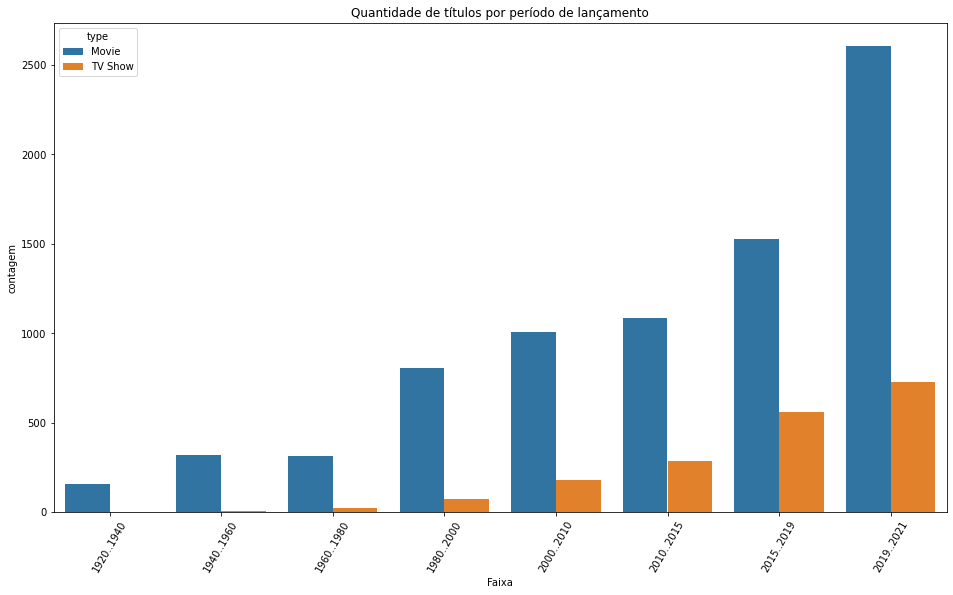

In [27]:
plt.figure(figsize=(16,9))
sns.barplot(x = "Faixa", y = "contagem", hue = 'type', data = dfByPeriod)
plt.xticks(rotation = 60)
plt.title("Quantidade de títulos por período de lançamento")
plt.show();

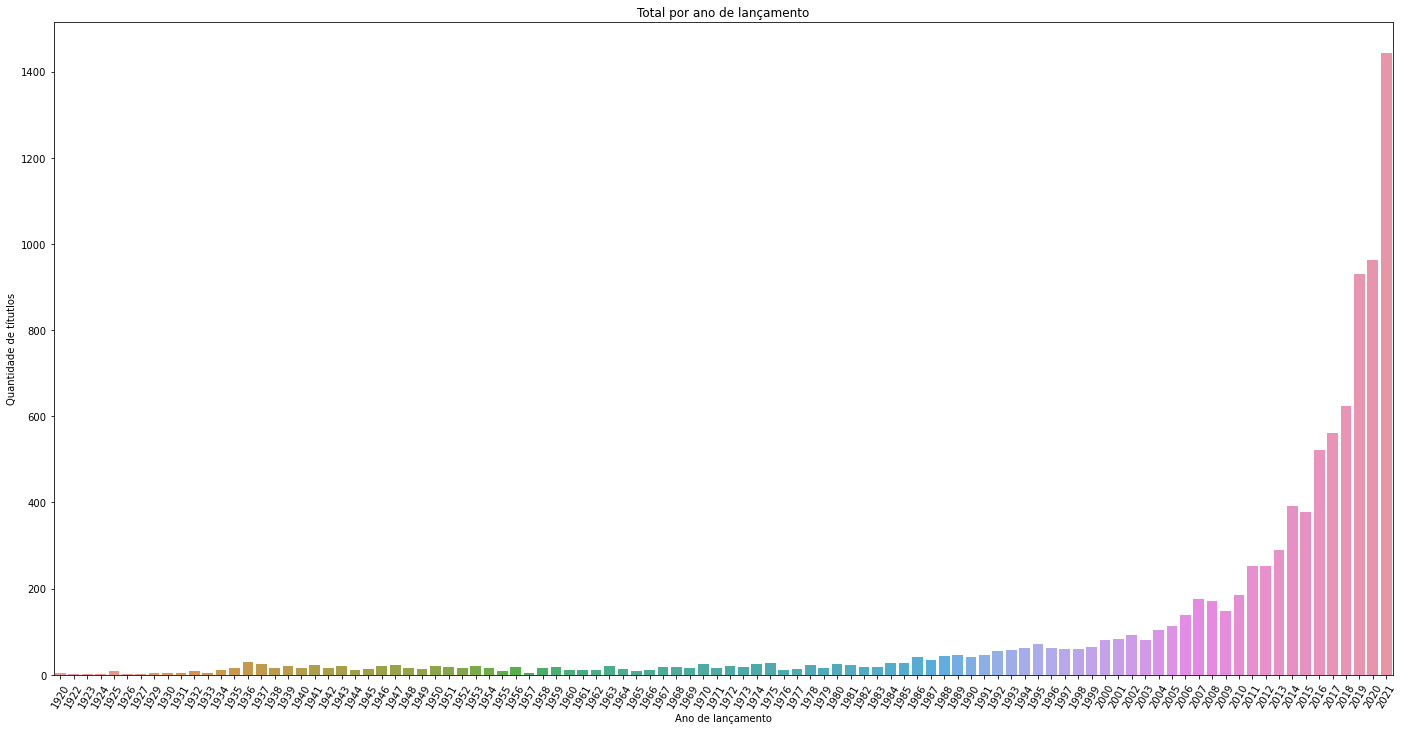

In [28]:
df = pd.DataFrame(dfCopy['release_year'].value_counts()).sort_index()
plt.figure(figsize=(24,12))
sns.barplot(x = df.index, y = df['release_year'])
plt.xticks(rotation =60)
plt.title("Total por ano de lançamento")
plt.ylabel("Quantidade de títutlos")
plt.xlabel("Ano de lançamento")
plt.show();